# 7 Sparse Kernel Machines

# 7.1 Maximum Margin Classifiers

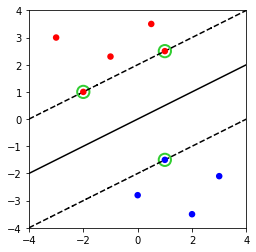

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import *

# training data
X_train = np.array([[-3, 3], [0.5, 3.5], [-1, 2.3],
                    [1, 2.5], [-2, 1], [1, -1.5],
                    [3, -2.1], [0, -2.8], [2, -3.5]])

t_train = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1])

# test data
X,Y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
X_test = np.array([X, Y]).reshape(2, -1).T

''' learning '''
model = C_SVM(kernel=PolynomialKernel(degree=1))
model.fit(X_train, t_train)
Z = model.predict(X_test)

# plotting train data
plt.scatter(*X_train.T, c=np.where(t_train > 0, 'r', 'b'), marker='.', s=100, linewidth=1.5, zorder=5)

# plot prediction data
plt.contour(X, Y, Z.reshape(X.shape), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.scatter(*model.support_vector['x'].T, s=150, facecolor="none", edgecolor='limegreen', linewidth=2)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

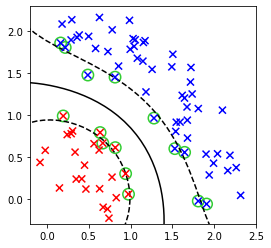

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import *

def make_circles(n_sample:int, noise, factor=.8, margin=[0, np.pi / 2]):
    N_in = int(n_sample // 3)
    N_out = n_sample - N_in
    _out = np.linspace(margin[0] - 0.05 * np.pi, margin[1] + 0.05 * np.pi, N_out)
    _in = np.linspace(margin[0], margin[1], N_in)
    bias = 0.2
    out_x, out_y = np.cos(_out) + bias, np.sin(_out) + bias
    in_x, in_y = np.cos(_in)-bias, np.sin(_in)-bias
    x = np.vstack([np.append(factor * out_x, 0.9 * in_x),
                   np.append(factor * out_y, 0.9 * in_y)]).T
    x += np.random.normal(scale=noise, size=x.shape)
    t = np.hstack([-np.ones(N_out), np.ones(N_in)])
    return x, t




# training data & test data
X_train, t_train = make_circles(80, factor=1.6, noise=0.2)
X,Y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
X_test = np.array([X, Y]).reshape(2, -1).T

''' learning '''
model = C_SVM(kernel=GaussianKernel(*[1,1,1]))
model.fit(X_train ,t_train, n_iter=100)
Z = model.predict(X_test)

# plot training data
plt.scatter(*X_train.T, c=np.where(t_train > 0, 'r', 'b'), marker='x', s=50, linewidth=1.5, zorder=5)

# draw prediction data
plt.contour(X, Y, Z.reshape(X.shape), np.array([-1,0,1]), colors="k", linestyles=("dashed","solid","dashed"))
plt.scatter(*model.support_vector['x'].T, s=130, facecolor="none", edgecolor='limegreen', linewidth=1.5)
plt.xlim([-0.2, 2.5])
plt.ylim([-0.3, 2.3])
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

## 7.1.1 Overlapping class distributions

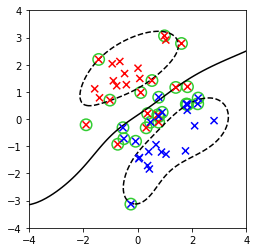

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import *

def generate_noise_data(N):
    correlation= [1., 0.5]
    cov = [correlation, np.flip(correlation)]
    N = int(N // 2)
    cls1 = np.random.multivariate_normal([-0.5,1], cov, int(N)).T
    cls2 = np.random.multivariate_normal([1,-0.5], cov, int(N)).T
    t = np.hstack((np.ones(cls1.shape[1]), -np.ones(cls2.shape[1])))
    return np.c_[cls1, cls2].T, t



# training data & test data
X_train, t_train = generate_noise_data(50)
X,Y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
X_test = np.array([X, Y]).reshape(2, -1).T

''' learning '''
model = C_SVM(kernel=GaussianKernel(*[1,0.5,0.5]), C=1.)
model.fit(X_train ,t_train, n_iter=100)
Z = model.predict(X_test)

# training data
plt.scatter(*X_train.T, c=np.where(t_train > 0, 'r', 'b'), marker='x', s=50, linewidth=1.5, zorder=5)

# prediction data
plt.contour(X, Y, Z.reshape(X.shape), np.array([-1,0,1]), colors="k", linestyles=("dashed","solid","dashed"))
plt.scatter(*model.support_vector['x'].T, s=130, facecolor="none", edgecolor='limegreen', linewidth=1.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

## 7.2. Relevance Vector Machines

## 7.2.1 RVM for regression

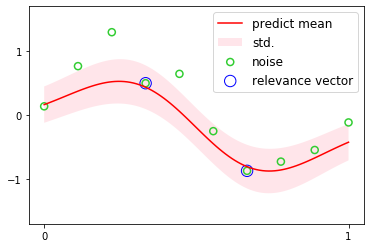

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import *

def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(n_sample):
    x = np.linspace(0, 1, n_sample)
    t = func(x) + np.random.normal(scale=0.2, size=n_sample)
    return x,t


x_train, y_train = generate_noise_data(10)
x = np.linspace(0, 1, 100)


'''---- Learning ----'''
model = RVM_regression(kernel=GaussianKernel(1., 20.))
model.fit(x_train, y_train)
y, y_std = model.predict(x, get_std=True)


# plot the test data
plt.plot(x, y, color='red', label="predict mean")
plt.fill_between(x, y + y_std, y - y_std, facecolor='pink', alpha=0.4, label="std.")

# plot the training data
plt.scatter(x_train, y_train, facecolor="none", edgecolor="limegreen", label="noise", s=50, linewidth=1.5)
plt.scatter(*model.relevance_vector.values(), s=130, facecolor="none", edgecolor="b", label="relevance vector")

# config for drawing
plt.legend(fontsize=12)
plt.xlim(-0.05, 1.05)
plt.ylim(-1.7, 1.7)
plt.xticks([0,1])
plt.yticks([-1,0,1])
plt.show()

## 7.2.3 RVM for classification

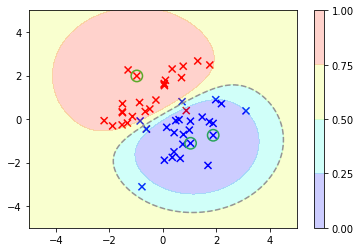

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import *

n_sample = 50

def generate_noise_data(N):
    correlation= [0.9, 0.5]
    cov = [correlation, np.flip(correlation)]
    cls1 = np.random.multivariate_normal([-0.5,1], cov, int(N//2)).T
    cls2 = np.random.multivariate_normal([1,-0.5], cov, int(N//2)).T
    t = np.hstack((np.ones(cls1.shape[1]),np.zeros(cls2.shape[1])))
    return np.c_[cls1, cls2].T, t



X_train, t_train = generate_noise_data(n_sample)
X,Y = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
X_test = np.array([X.ravel(), Y.ravel()]).reshape(2,-1).T


''' Learning '''
model = RVM_classifier(kernel=GaussianKernel(1, 0.5))
model.fit(X_train, t_train)
Z = model.predict(X_test)

# plotting training data
plt.scatter(*X_train.T, c=np.where(t_train, 'r', 'b'), marker='x', s=50, linewidth=1.5)
plt.scatter(*model.relevance_vector['x'].T, s=130, facecolor="none", edgecolor='limegreen', linewidth=1.5)

# plotting test data
plt.contour(X, Y, Z.reshape(X.shape), alpha=1, levels=np.linspace(0, 1, 3), cmap='Greys', linestyles='--')
plt.contourf(X, Y, Z.reshape(X.shape), alpha=0.2, levels=np.linspace(0, 1, 5), cmap='jet')
plt.colorbar()
plt.show()
